## 1. k-means for clustering on digits

In [13]:
# 加载数据集
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
digits = load_digits()
digits.data.shape

(1797, 64)

In [5]:
# 使用K-Means 进行聚类
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

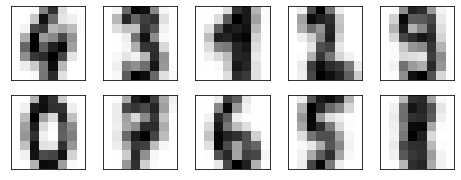

In [6]:
# 我们可以直接通过K-Means聚类来查看数据集中的数据，甚至不需要标签
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
plt.savefig("./digit_test.svg",format='svg')

In [9]:
len(np.zeros_like(clusters))

1797

In [10]:
# mode 函数数组/矩阵最常出现的值
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7952142459654981

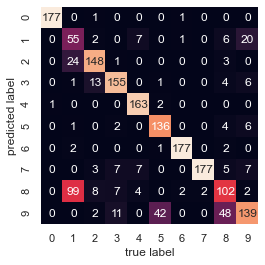

In [14]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("./digit_result.svg",format='svg')

In [15]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)


0.9371174179187535

## 2. k -means for color compression

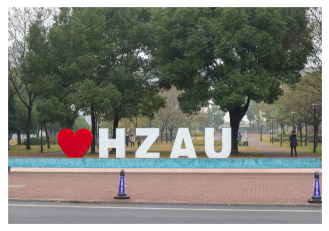

In [16]:
# 需要提前安装 ``pillow`` 包
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans,MiniBatchKMeans
from PIL import Image
hzau = np.array(Image.open("HZAU.JPG"))
hzau.shape
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(hzau)

In [17]:
hzau.shape

(3616, 5232, 3)

In [18]:
data = hzau / 255.0 # use 0...1 scale
data = data.reshape(3616* 5232, 3)
data.shape

(18918912, 3)

In [19]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # 选择子集
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20)

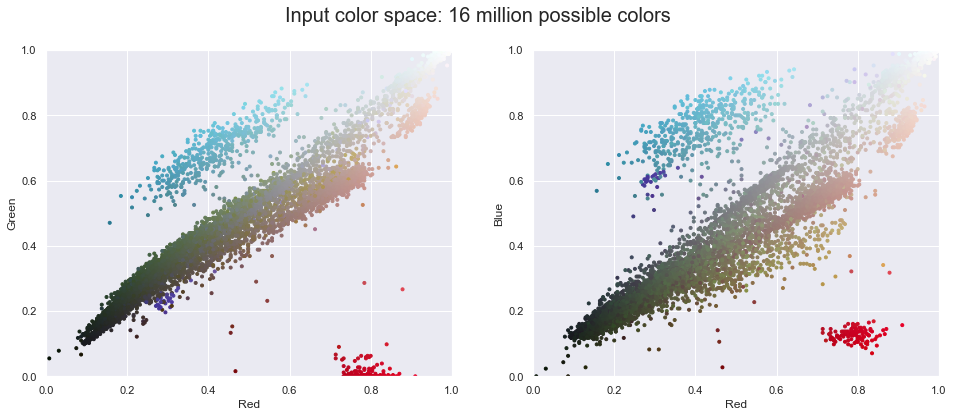

In [20]:
plot_pixels(data, title='Input color space: 16 million possible colors')

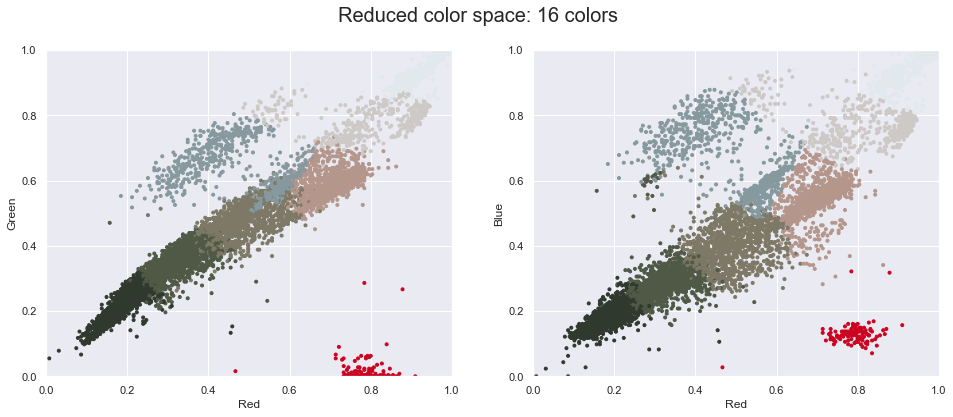

In [21]:
import warnings; warnings.simplefilter('ignore')  
from sklearn.cluster import MiniBatchKMeans
kmeans_one = MiniBatchKMeans(8)
kmeans_two = MiniBatchKMeans(4)
kmeans_one.fit(data)
kmeans_two.fit(data)
new_colors_one = kmeans_one.cluster_centers_[kmeans_one.predict(data)]
new_colors_two = kmeans_two.cluster_centers_[kmeans_two.predict(data)]

plot_pixels(data, colors=new_colors_one,
            title="Reduced color space: 8 colors")

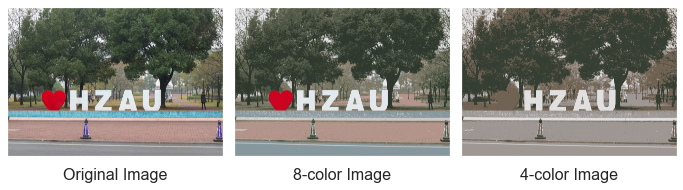

In [22]:
hzau_recolored_one = new_colors_one.reshape(hzau.shape)
hzau_recolored_two = new_colors_two.reshape(hzau.shape)
fig, ax = plt.subplots(1, 3, figsize=(12, 3),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(hzau)
ax[0].set_title('Original Image', size=16,y=-0.2)
ax[1].imshow(hzau_recolored_one)
ax[1].set_title('8-color Image', size=16,y=-0.2)
ax[2].imshow(hzau_recolored_two)
ax[2].set_title('4-color Image', size=16,y=-0.2)
plt.savefig("ori_8_4.svg",format='svg')